# Dragon Real Estate 

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,NaN,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285214,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704971,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
# for plotting
#import matplotlib.pyplot as plt
#housing.hist(bins=50, figsize=(20,15))

# Train-Test Splitting

In [9]:
# for learning purpose
#import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]   
    return data.iloc[train_indices],data.iloc[test_indices]

random.permutation is gonna randomly select the data

np.random.seed(42) is gonna fix the values of train and test amd we wont do it then our train and test would mix.(we get the same train and test sets across different executions)

np.random.seed(42) is a syntax

len of data is 506 and 506 * 0.2 is 101

    test_indices = shuffled[:test_set_size] its gonna select from 0th index to 101th
    train_indices = shuffled[test_set_size:] its gonna select from 101th to last

In [10]:
#train_set, test_set = split_train_test(housing, 0.2)

In [11]:
#print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}\n")

we can also do this with the help of sklearn

In [12]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing,test_size =0.2, random_state = 42)
print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}\n")

Rows in train set : 404
Rows in test set : 102



there could be a problem in CHAS, because the entire column only contain either value 0 or 1, and what if because of np.random.permutation the train set select all 0 values then there would be problem so we need to select randomly values from CHAS that in training it takes some 0 and 1 also so in testing there would be no problem

we would use StratifiedShuffleSplit to solve this problem and it will take both 0 and 1 for training and testing

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [16]:
95/7

13.571428571428571

In [17]:
376/28

13.428571428571429

In [18]:
# copying the strat_train_set data in housing
housing = strat_train_set

# Looking for Correlations

correlation values lie betweem -1 and 1

strong positive correlation, if you increase first value then the 2nd value will also increase

negative correlation, if you increase the value of something then it decrases the value of other thing

In [19]:
corr_matrix = housing.corr()

In [20]:
corr_matrix.MEDV.sort_values(ascending= False)

MEDV       1.000000
RM         0.679280
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

its gonna give you the correlations of MEDV with others as you can see RM, ZN, B, DIS, CHAS are positively correlated,

means if there MEDV value increases then there value also increases

array([[<AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

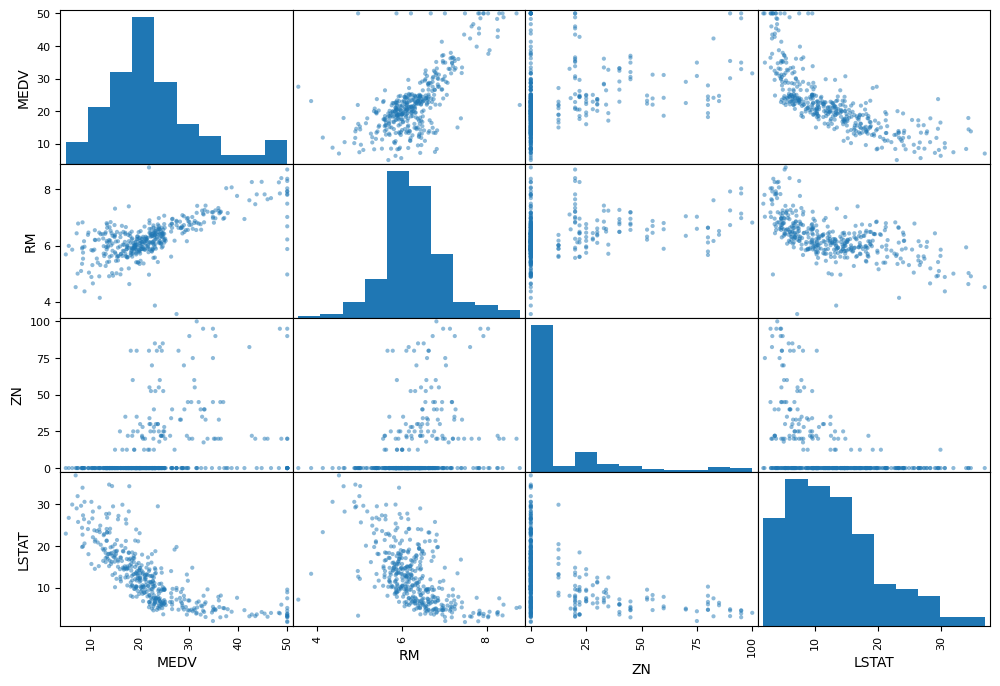

In [21]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV','RM', 'ZN', 'LSTAT']
scatter_matrix(housing[attributes], figsize = (12,8))

as you can see MEDV and RM are highly positiive correlated because if MEDV increases then RM also increases

MEDV and LSTAT are negative correlated because if one increases then another decreases

diagonals are just ploting histogram graph of those columns

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

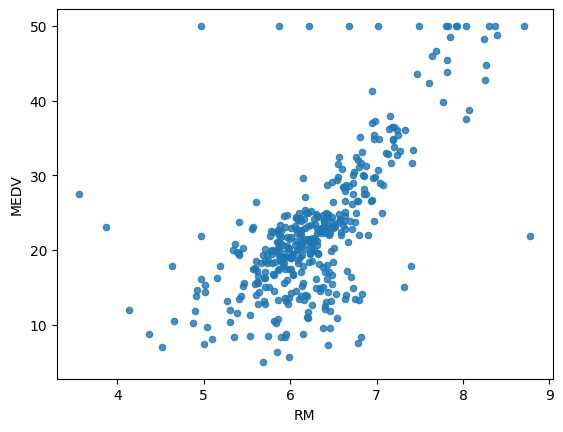

In [22]:
housing.plot(kind="scatter",x="RM",y="MEDV", alpha=0.8)

alpha 0.8 would increase or highlight the density areas (where there are lots of points)

# Trying Out Attribute combinations

we are gonna make some new attribute by ourself 

we are gonna make a new attribute TAXRM which is tax per room

In [23]:
housing['TAXRM'] = housing.TAX/housing.RM

In [24]:
housing.TAXRM

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [25]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [26]:
corr_matrix = housing.corr()
corr_matrix.MEDV.sort_values(ascending= False)

MEDV       1.000000
RM         0.679280
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525942
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot: xlabel='TAXRM', ylabel='MEDV'>

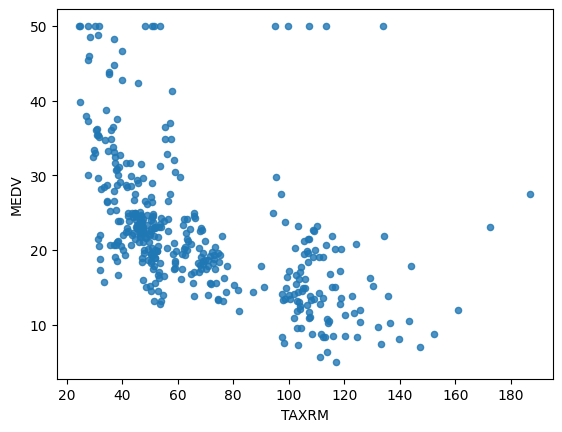

In [27]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV", alpha=0.8)

TAXRM and MEDV are highly negative correlated

if the value of TAXRM increases then the value of MEDV decreases

In [28]:
housing = strat_train_set.drop('MEDV', axis = 1)
housing_labels = strat_train_set.MEDV
# you can also write it as a => housing_labels = strat_train_set['MEDV'].copy()

# Missing Attributes

to take care of missing attributes you have 3 options

    1. Get rid of missing data points
    2. Get rid of whole attribute (delete the whole column)
    3. Set the value to some value (0 mean and median)

In [29]:
#Option 1
a = housing.dropna(subset=['RM'])
a.shape
# dropna means wherever the value is null drop it
# note that the original housing dataframe will remain unchanged because we have not set inplace = True

(399, 14)

In [30]:
#Option 2
housing.drop('RM', axis=1).shape
# note that the original housing dataframe will remain unchanged because we have not set inplace = True

(404, 13)

In [31]:
median = housing.RM.median()
median

6.216

In [32]:
#Option 3
housing.RM.fillna(median)
# fillna means wherever the value is na fill it with the median
# note that the original housing dataframe will remain unchanged because we have not set inplace = True

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [33]:
housing.describe() # before we started filing attributes with the help of SimpleImputer
# RM only has 399 values which means 5 values are missing 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280576,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,67.714359
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716030,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,31.559964
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.877000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,44.910026
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,54.027505
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,98.673976
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,187.026116


In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [35]:
imputer.statistics_

array([2.86735000e-01, 0.00000000e+00, 9.90000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.21600000e+00, 7.82000000e+01, 3.12220000e+00,
       5.00000000e+00, 3.37000000e+02, 1.90000000e+01, 3.90955000e+02,
       1.15700000e+01, 5.40275049e+01])

In [36]:
imputer.statistics_.shape

(14,)

In [37]:
X = imputer.transform(housing)

In [38]:
housing_tr = pd.DataFrame(X, columns = housing.columns)

In [39]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279777,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,67.544967
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711610,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,31.400144
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,45.017395
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,54.027505
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,187.026116


# Scikit-leaarn Desiging

Scikit Learn primarily has three types of objects

1. Estimators -it estimates (guess) some parameters based on a datasets. ex- imputer, it has a fit method and transform method.
fit method - it fits the dataset and calculates internal parameters.
2. Transformers - transform method takes imput and returns output based on the learning from fit(), it also has a convenience function called fit(),which fits and then transform.
3. Predictors - LinearRegression is an example of predictor, fit() and predict() are two common functions. it also gives score() function which will evaluate the predictions.

# Features scaling

Features Scaling has two methods -

1. Min-Max Scaling (Normalization) - 
    (Value - min) / (max - min)
    Sklearn provides a class for this called MinMaxScaler
    
2. Standardixation -
    (Value - mean) / Standard Deviation
    Sklearn provides a class for this called StandardScaler

# Creating a Pipeline

A pipeline provides a systematic way to preprocess and analyze data in a way that allows machine learning models to learn and make accurate predictions.

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                        # ...... add as many as you want inyour pipeline
                        ('std_scaler', StandardScaler()),
                       ])


In [41]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [42]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ...,  0.41164221,
        -0.86091034, -0.50933088],
       [-0.44352175,  3.12628155, -1.35893781, ...,  0.39131918,
        -0.94116739, -0.80814724],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.44624347,
         0.81480158,  1.12142843],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ...,  0.41831233,
        -1.27603303, -1.02836591],
       [ 0.14210728, -0.4898311 ,  0.98336806, ..., -3.15239177,
         0.73869575,  1.10084863],
       [-0.43974024, -0.4898311 ,  0.37049623, ...,  0.41070422,
         0.09940681, -0.65909239]])

# Selecting a desired model for Dragon Real Estate

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# model = DecisionTreeRegressor()
# model = LinearRegression()
model.fit(housing_num_tr, housing_labels)


RandomForestRegressor()

In [44]:
some_data = housing.iloc[:5]

In [45]:
some_labels = housing_labels.iloc[:5]

In [46]:
prepared_data = my_pipeline.transform(some_data)

In [47]:
model.predict(prepared_data)

array([22.292, 25.42 , 16.385, 23.426, 23.46 ])

In [48]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the model

In [49]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [50]:
rmse

1.2288297681167637

# using better evaluation technique - Cross Validation

In cross-validation, the data is split into k-folds, where k is a user-defined parameter typically set to 5 or 10. The model is trained on k-1 folds of the data and validated on the remaining fold. This process is repeated k times, with each fold serving as the validation set exactly once. The results from each fold are then averaged to obtain a final performance metric, such as accuracy or mean squared error.

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv=10)
# cv = 10 means 0 folds
rmse_scores = np.sqrt(-scores)
# making scores positive again so we can get its sqrt
                         

In [52]:
rmse_scores

array([2.88544479, 2.95171591, 4.62501852, 2.60578844, 3.44038829,
       2.87658187, 4.5153242 , 3.42049787, 2.82731435, 3.10930256])

In [53]:
def print_scores(scores):
    print("Scores", scores)
    print("Mean", scores.mean())
    print("Standard Deviation", scores.std())

In [54]:
print_scores(rmse_scores)

Scores [2.88544479 2.95171591 4.62501852 2.60578844 3.44038829 2.87658187
 4.5153242  3.42049787 2.82731435 3.10930256]
Mean 3.3257376816847852
Standard Deviation 0.6689139702787719


Decision Tree Output -

Scores [4.22798459 5.48354523 5.44553968 4.47229957 3.28968084 4.00421653
 6.01423312 4.11873767 3.5416098  4.52871395]
 
Mean 4.51265609669447

Standard Deviation 0.8368295725259955

Linear Regression Output -

Scores [3.20356642 3.29988126 4.26233484 3.85659972 4.89608613 3.72085537
 7.4554395  4.22371911 3.45788259 5.10917793]
 
Mean 4.348554286561035

Standard Deviation 1.199755243854482

Random Forest Regressor -

Scores [2.89959643 2.80082686 4.47775285 2.62097547 3.36224655 2.62522343
 4.65404613 3.42260959 3.08885548 3.2585087 ]
 
Mean 3.3210641484483276

Standard Deviation 0.6787644348739297

# saving the model

In [55]:
from joblib import dump, load
dump(model, "Dragon.joblib")

['Dragon.joblib']

# Testing the Model

In [56]:
X_test = strat_test_set.drop("MEDV", axis = 1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- TAXRM


In [62]:
final_rmse

NameError: name 'final_rmse' is not defined

# Using the Model

In [57]:
import numpy as np

In [59]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.2416917 , -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034, -0.50933088])

In [60]:
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.2416917 , -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034, -0.50933088]])

In [61]:
model.predict(features)

array([22.292])